# ACML Assignment 1

In [33]:
import numpy as np

### Create the training data 

In [34]:
inputs = []

for i in range(8):
    input = np.zeros(((8+1),1)) # +1 is the bias
    input[0] = 1 # bias at the beginning of the input
    input[i+1] = 1
    inputs.append(input)

#print(inputs[0:2])
#len(inputs)

### Initialize Weights

In [35]:
# Weights
W1 = np.random.normal(0, 0.1, 3*9).reshape(3, 9) # 3x9 matrix
W2 = np.random.normal(0, 0.1, 8*4).reshape(8, 4) # 8x4 matrix

### Initialize Hyperparameters

In [38]:
lr = 0.1
batch_size = 5
weight_decay = 0
epochs = 100

### Define functions

In [39]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def softmax(x):
    e = np.exp(x)
    return(e/e.sum())

def argmax(x): 
    a2_index = np.argmax(x)
    a2 = np.zeros(8)
    a2[a2_index] = 1
    return(a2)

# forward propagation function
# a0 is the input layer, which must be of shape (9,1) (8+1)
# returns the activations of layer 1 and 2
def forward_prop(a0):
    a1 = sigmoid(np.dot(W1, a0)) # (3x9) . (9x1) = (3x1)
    a1 = np.insert(a1, 0, 1) # insert bias to make it (4x1)
    a2 = sigmoid(np.dot(W2, a1))
    return(a1, a2) # returns (4x1) and (8x1)

# back propagation function
# inputs are: a0 (=y), a1, a2 (activation of layer 1 and 2)
# outputs are:
def back_prop(a0, a1, a2):
    
    # compute the costs (squared error)
    cost_MSE = np.sum(np.square(a2 - a0))

    # compute the deltas for layer 2 and 1
    delta2 = a2 * (np.ones(8) - a2) * (a2 - a0) # deltas in layer 2 (output)
    #       (8x1) * ((8x1) - (8x1)) * ((8x1)-(8x1)) = (8x1)

    #print("a2", a2)
    #print("a0", a0)

    delta1 = a1 * (np.ones(4) - a1) * np.dot(W2.T, delta2) # deltas in layer 1 (hidden)
    #         (4x1) * ((4x1) - (4x1))  *  ((4x8) . (8x1))   = (4x1)
    #                                          (4x1)

    # compute the partial derivatives for weigthts 2
    #print("delta2", delta2.reshape(8,1))
    #print("a1", a1.reshape(1,4))
    deriv_W_2 = np.dot(delta2.reshape(8,1), a1.reshape(1,4))
    #print("derivative of Weight 2 including Bias", deriv_W_2)


    # compute the partial derivatives for weights 1
    # insert bias to a0
    a0_with_bias = np.insert(a0, 0, 1)
    a0_with_bias = a0_with_bias
    
    # delete bias for delta1
    delta1 = np.delete(delta1, 0)
    #print("delta1", delta1.reshape(3, 1))
    #print("a0", a0_with_bias.reshape(1, 9))
    deriv_W_1 = np.dot(delta1.reshape(3, 1), a0_with_bias.reshape(1, 9))
    #print("derivative of Weight 1 including bias", deriv_W_1)

    #print(deriv_W_1.shape, deriv_W_2.shape)   
    return(deriv_W_1, deriv_W_2, cost_MSE)


In [40]:
print(inputs[0])

# activations of layer 1 and 2
ta1, ta2 = forward_prop(inputs[0])

y = np.delete(inputs[0], 0)
print("y", y)
der1, der2, cost= back_prop(y, ta1, ta2)

print("activations of layer 1 and 2")
print(ta1, ta2)
print("derivatives of the weights W1 and W2")
der1, der2

[[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
y [1. 0. 0. 0. 0. 0. 0. 0.]
activations of layer 1 and 2
[1.         0.46744257 0.6055483  0.46915545] [0.42641131 0.41918088 0.46358599 0.54520435 0.51236838 0.47209883
 0.48152676 0.50176811]
derivatives of the weights W1 and W2


(array([[ 0.0123558 ,  0.0123558 ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.00522715, -0.00522715, -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        ],
        [ 0.00403817,  0.00403817,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ]]),
 array([[-0.14029102, -0.065578  , -0.08495299, -0.0658183 ],
        [ 0.10205724,  0.0477059 ,  0.06180059,  0.04788071],
        [ 0.11528179,  0.05388762,  0.06980869,  0.05408508],
        [ 0.135187  ,  0.06319216,  0.08186226,  0.06342372],
        [ 0.12801371,  0.05983906,  0.07751849,  0.06005833],
        [ 0.11765719,  0.05499798,  0.07124711,  0.05519951],
        [ 0.12021736,  0.05619471,  0.07279742,  0.05640063],
        [ 0.12544046,  0.05863621,  0.07596026,  0.05885108]]))

In [41]:
loss = list()
# loop over number of iterations
for i in range(epochs):

    # loop over batch size
    deriv1_outer = np.zeros((3,9))
    deriv2_outer = np.zeros((8,4))
    for m in range(batch_size): #batch size 8
        
        # select a random training sample
        train_sample = inputs[np.random.randint(0, 8)]
        
        # perform forward propagation
        ta1, ta2 = forward_prop(train_sample)
        
        # perform backward propagation
        y = np.delete(train_sample, 0)
        deriv1, deriv2, cost = back_prop(y, ta1, ta2)
        
        # add the partial derivatives to the batch derivatives
        #print(deriv1.shape, deriv1_outer.shape)
        deriv1_outer = deriv1_outer + deriv1
        deriv2_outer = deriv2_outer + deriv2
        loss.append(cost)

    W1_new = W1 - (lr * ((1/batch_size) * deriv1_outer + weight_decay * W1))
    W2_new = W2 - (lr * ((1/batch_size) * deriv2_outer + weight_decay * W2))
    W1_new[:,0] = W1[:,0] - lr * (1/batch_size) * deriv1_outer[:,0]
    W2_new[:,0] = W2[:,0] - lr * (1/batch_size) * deriv2_outer[:,0]
    W1 = W1_new
    W2 = W2_new



In [45]:
print(W2)
print(W1)

[[-0.7013325  -0.21558519 -0.29734088 -0.30433805]
 [-0.64684753 -0.17946414 -0.35702943 -0.33718509]
 [-0.64558539 -0.1923645  -0.33813221 -0.18148058]
 [-0.54872916 -0.1339421  -0.26686836 -0.19481343]
 [-0.64062617 -0.22235802 -0.34399442 -0.07441611]
 [-0.62880205 -0.25468303 -0.19189056 -0.37865234]
 [-0.5077804  -0.17059036 -0.48867957 -0.26026773]
 [-0.44053178 -0.18902297 -0.37780074 -0.36635505]]
[[ 0.01143716 -0.06748023  0.0397129  -0.12825191  0.03199236  0.09599231
   0.07918466 -0.02065795 -0.00148554]
 [ 0.42860244  0.1912877  -0.01024228 -0.10696691  0.05171747  0.01499932
   0.13209413  0.10253952  0.09002425]
 [ 0.06428086 -0.05033201 -0.01479885  0.09098277  0.08185651 -0.00251242
   0.20254588  0.01149649  0.06460924]]


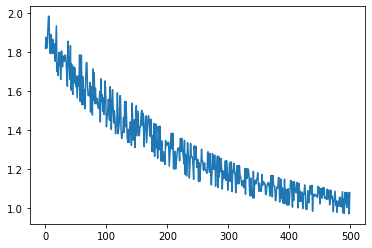

In [43]:
import matplotlib.pyplot as plt

plt.plot((list(range(len(loss)))), loss)
plt.show()

In [44]:
print(inputs[1])

_, output = forward_prop(inputs[1])

print(output)

[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[0.24101224 0.24472293 0.26093082 0.29355618 0.26889497 0.25556736
 0.26437974 0.27827856]
